# Copying images training, validation and test directories

In [1]:
import os,shutil

In [2]:
# train directory
train_dir = "/train"

# validation directory
validation_dir = "/validation"

# test directory
test_dir = "/test"

# train cats directory
train_cats_dir = "/train_cat"

# train dogs directory
train_dogs_dir = "/train_dog"

# validation cats directory
validation_cats_dir = "/validation_cat"

# validation dogs directory
validation_dogs_dir = "/validation_dog"

# test cats directory
test_cats_dir = "/test_cat"

# test dogs directory
test_dogs_dir = "/test_dog"

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

# Instantiating a small convnet for dogs vs. cats classfication

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# Configuring the model for training

In [8]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate =1e-4),
              metrics = ['acc'])

# Using ImageDataGenerator to read images from directories

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    # binary label used because we used binary_crossentropy loss
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2002 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.


In [10]:
def generator():
  i = 0
  while True:
    i += 1
    yield i


for item in generator():
  print(item)
  if item > 4:
    break

1
2
3
4
5


In [11]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting the model using a batch generator

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch =100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 615s 6s/step - acc: 0.5201 - loss: 0.6960 - val_acc: 0.5070 - val_loss: 0.6874
Epoch 2/30
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.4000 - loss: 0.7244

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.4000 - loss: 0.7244 - val_acc: 0.4444 - val_loss: 0.6816
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - acc: 0.5790 - loss: 0.6749 - val_acc: 0.6150 - val_loss: 0.6510
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - acc: 0.7500 - loss: 0.6127 - val_acc: 0.8889 - val_loss: 0.5650
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - acc: 0.6360 - loss: 0.6403 - val_acc: 0.6370 - val_loss: 0.6291
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - acc: 0.5000 - loss: 0.6651 - val_acc: 0.6667 - val_loss: 0.6118
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - acc: 0.6729 - loss: 0.6042 - val_acc: 0.6660 - val_loss: 0.6014
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - acc: 0.9000 - loss: 0.4867 - val_acc: 0.4444 - val_loss: 0.6574
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - acc: 0.6831 - loss: 0.5792 - val_acc: 0.6910 - val_loss: 0.5854
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms

# Saving the model

In [14]:
model.save("cats_and_dogs_small_1.h5")
model.save('Cats and Dogs.keras')


# Displaying curves of loss and accuracy during training

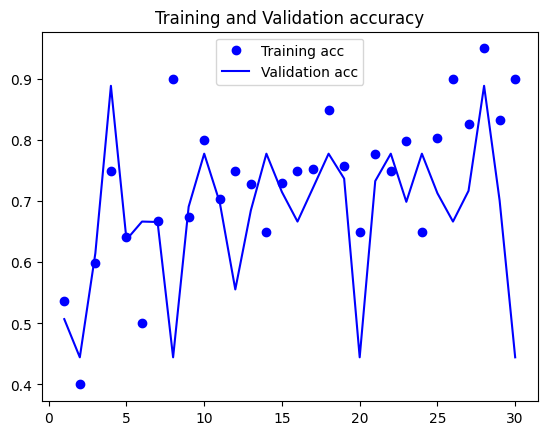

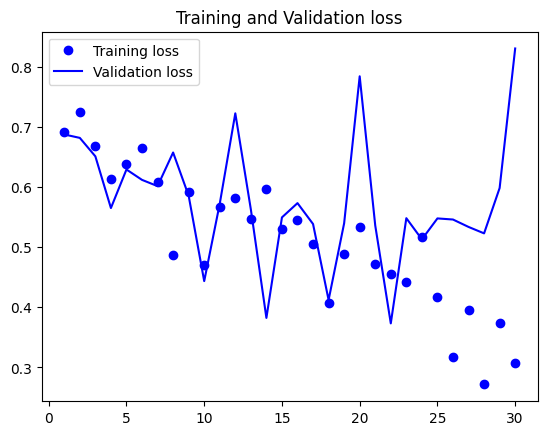

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Setting up a data augmentation configuration via ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

# Displaying some randomly augmented training images

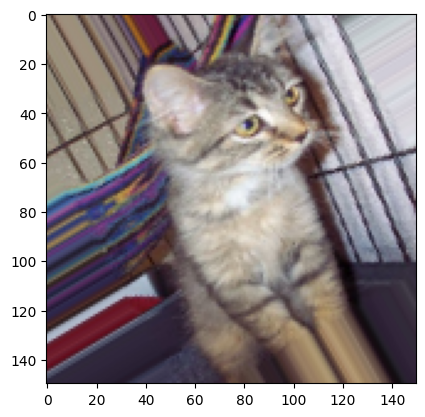

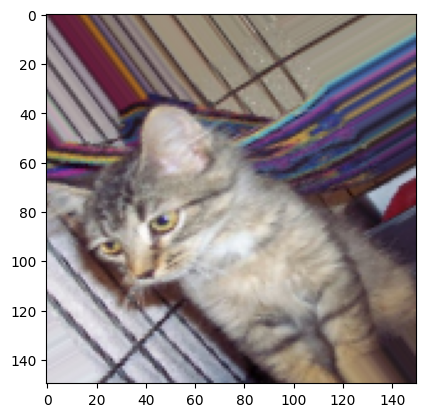

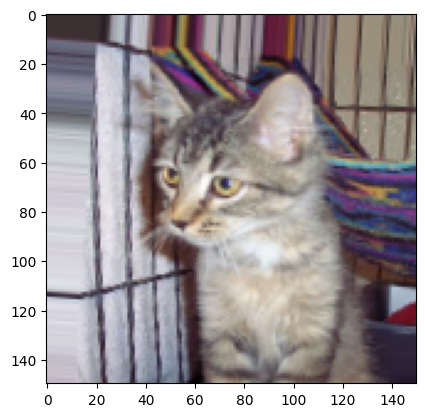

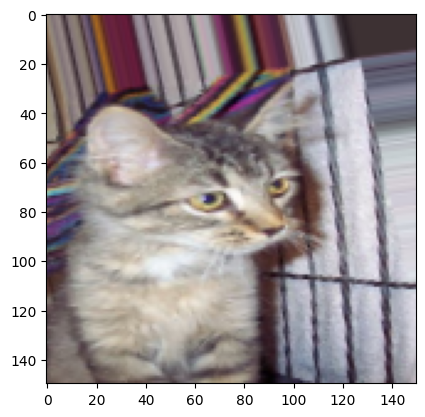

In [17]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i =  0
for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

# Defining a new convnet that includes dropout

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training the convnet using data-augmentation generators

In [19]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50)

Found 2002 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 62/100 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - acc: 0.5154 - loss: 0.6963

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 265ms/step - acc: 0.5160 - loss: 0.6957 - val_acc: 0.5094 - val_loss: 0.6899
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 220ms/step - acc: 0.5337 - loss: 0.6909 - val_acc: 0.5055 - val_loss: 0.6890
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - acc: 0.5207 - loss: 0.6908 - val_acc: 0.5045 - val_loss: 0.6892
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 229ms/step - acc: 0.5544 - loss: 0.6869 - val_acc: 0.6155 - val_loss: 0.6682
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - acc: 0.5903 - loss: 0.6695 - val_acc: 0.6204 - val_loss: 0.6588
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - acc: 0.5885 - loss: 0.6690 - val_acc: 0.6056 - val_loss: 0.6563
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 216ms/step - acc: 0.6054 - loss: 0.6620 - val_acc: 0.5619 - val_loss: 0.6858
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 217ms/step - acc: 0.6319 - loss: 0.6476 - val_acc: 0.5104 - val_loss: 0.7818
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

# Saving the model

In [20]:
model.save('çats_and_dogs_small_2.h5')
model.save('cats and dogs.keras')

# Displaying curves of loss and accuracy with data augmentation

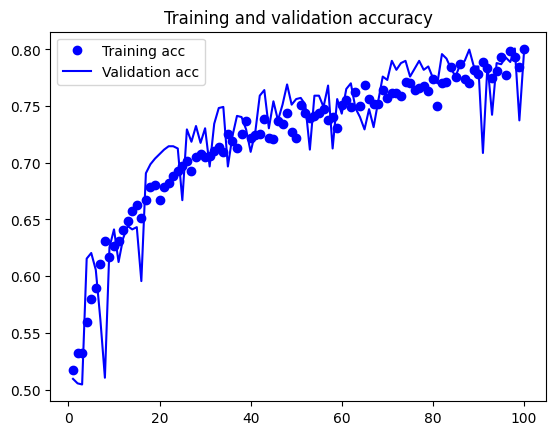

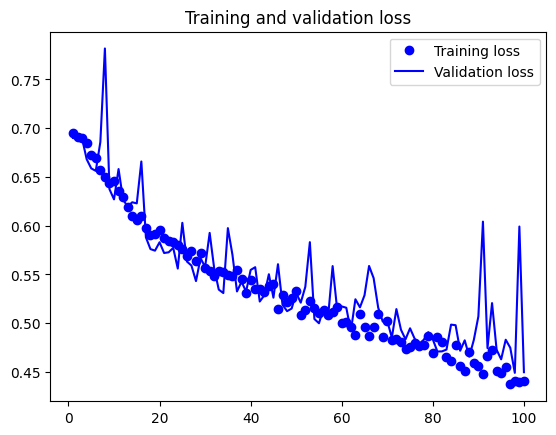

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()